In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import warnings
warnings.filterwarnings('ignore')

In [20]:
baking_df = pd.read_csv('../data/HealthyBaking.csv', skiprows=1, index_col=0)
cooking_df = pd.read_csv('../data/HealthyRecipe.csv', skiprows=1, index_col=0)
baking_overtime_df = pd.read_csv('../data/bakingyrs.csv', skiprows=1, index_col=0)
cooking_overtime_df = pd.read_csv('../data/cookingyrs.csv', skiprows=1, index_col=0)

## Google Trends Data

To begin this project, I am curious to see if more people were interested in finding healthy baking and cooking recipes when COVID-19 hit. I loaded four dataset: The Google Trends in 2020 for "Healthy Baking Recipe", Google Trends in 2020 for "Healthy Cooking Recipe", Google Trends from 2015-2020 for "Healthy Baking Recipe" and Google Trends from 2015-2020 for "Healthy Cooking Recipe." 
 - Healthy baking recipe 2020: https://trends.google.com/trends/explore?q=healthy%20baking%20recipe&geo=US
 - Healthy cooking recipe 2020: https://trends.google.com/trends/explore?geo=US&q=healthy%20cooking%20recipe
 - Healthy cooking recipe since 2015: https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=healthy%20cooking%20recipe
 - Healthy baking recipe since 2015: https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=healthy%20baking%20recipe

I am using Google Trends to gage interest in healthy baking and cooking. The rest of my project focuses on social media data; however, I cannot measure the amount of Followers over time. Looking at whether Instagram accounts increase of decrease their numbers of Followers over time is a concrete way to determine how interested people are in healthy food. As a result, I am using Google Trends as a proxy for Follower data.  

# "Healthy Baking Recipe" Google Trends Data 

In [4]:
baking_df.shape

(52, 1)

This means that the data set has 52 rows and 1 column. Because Good Trends groups data on a weekly basis, 52 weeks is the equivalent of one year worth of data. Each row has the Google Search trend for the term "Healthy Baking Recipe" 

In [5]:
baking_df.head()

,healthy baking: (United States)
Week,
2019-10-20,51
2019-10-27,29
2019-11-03,57
2019-11-10,25
2019-11-17,56


This is telling us the Google Trend data for the term "Healthy Baking Recipe" on a weekly basis. Google Trends inputs data on a weekly basis and always starts on Sunday. In Google Trends, every number on the y-axis represents search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular.

Text(0.5, 1.0, '"Healthy Baking Recipe" Google Trends in 2020')

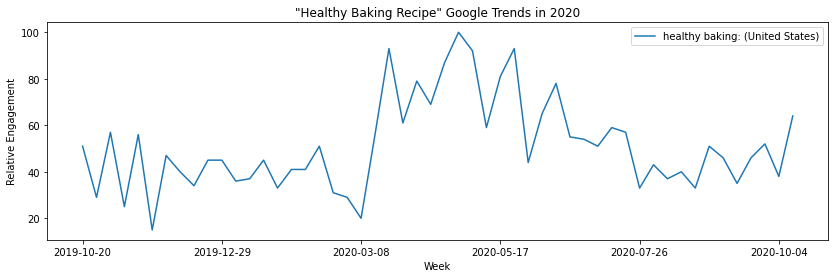

In [6]:
baking_df.plot(figsize = (14,4))
plt.ylabel('Relative Engagement')
plt.title('"Healthy Baking Recipe" Google Trends in 2020')

It looks like the search trend for "Healthy Baking Recipes" was most popular around March 8th, around when quarantine mandates started. This surge lasted for about 3 months and then started to come down. However, it might be spiking again. It is notable that all of this data is "relative". In other words, we are not looking at how many people typed in the search term "Healthy Baking". 

I think it is important to note that we should not attribute the peaks directly to the pandemic– people become more and less interested in being healthy every year. Therefore, stay at home orders might have helped spur a movement towards baking, but we cannot draw an causal conclusions. To see this we should look at data from the past five years.

In [7]:
baking_overtime_df.shape

(260, 1)

This gives us the same search term "Healthy Baking Recipe" but it shows 5 years worth of data

Text(0.5, 1.0, '"Healthy Baking Recipe" Google Trends since 2015')

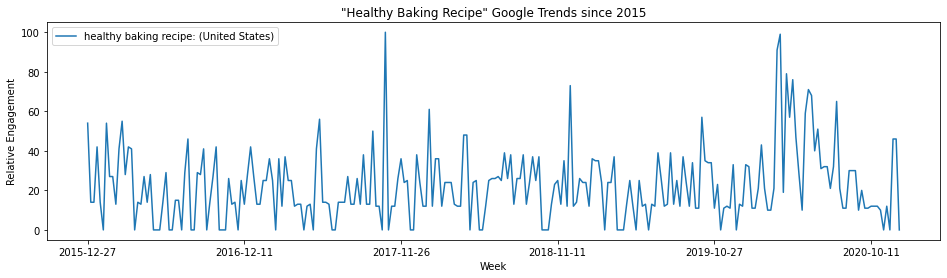

In [8]:
baking_overtime_df.plot(figsize = (16,4))
plt.ylabel('Relative Engagement')
plt.title('"Healthy Baking Recipe" Google Trends since 2015')

This shows the search trends for "Healthy Baking Recipe" since 2015. Extending the data back 5 years shows us that there are various moments in which there is a surge in popularity. In other words, this is not exceptionally unique to the 2020 COVID-19 Pandemic. However, we do see some more sustained popularity in 2020. This COULD be attributed to the fact that states were in lock down– it is something worth analyzing when we look at COVID-19 data. 

# "Healthy Cooking Recipe" Google Trends Data 

In [9]:
cooking_df.shape

(52, 1)

This means that there are 52 rows and 1 column of this data. Each row has the Google Search trend for the term "Healthy Cooking Recipe" 

In [10]:
cooking_df.head()

,healthy recipe: (United States)
Week,
2019-10-20,60
2019-10-27,58
2019-11-03,59
2019-11-10,63
2019-11-17,58


This is telling us the Google search trend data for the term "Healthy Cooking Recipe" on a weekly basis. Google Trends inputs data on a weekly basis and always starts on Sunday. In Google Trends, number represents search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular.

Text(0.5, 1.0, '"Healthy Cooking Recipe" Google Trends in 2020')

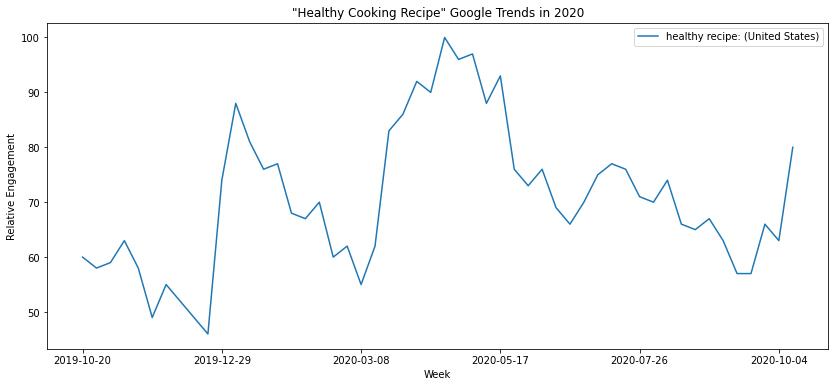

In [11]:
cooking_df.plot(figsize = (14,6))
plt.ylabel('Relative Engagement')
plt.title('"Healthy Cooking Recipe" Google Trends in 2020')

This graph has different peaks and troughs than the baking graph, but also sees an increase in popularity for the search trend "Healthy Cooking Recipe" started around March 8th, when quarantine mandates were in place. The other significant peak that I notice is around December 29th, which is New Years. I know that a lot of people make eating healthy their New Year Resolution, so perhaps this is the data we are seeing. While this is irrelevant to the question I am investigating. it is interesting. 

In [12]:
cooking_overtime_df.shape

(260, 1)

This shows trends for the search term "Healthy Cooking Recipe" over the past 5 years. The purpose of this is to see if the peaks are unique to quarantine or more general.

Text(0.5, 1.0, '"Healthy Cooking Recipe" Google Trends since 2015')

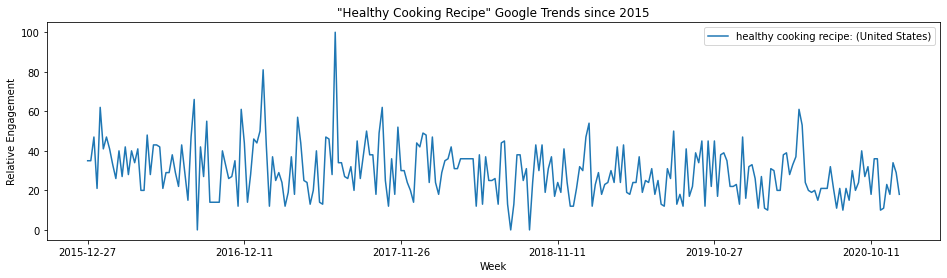

In [13]:
cooking_overtime_df.plot(figsize=(16,4))
plt.ylabel('Relative Engagement')
plt.title('"Healthy Cooking Recipe" Google Trends since 2015')

The graph shows that the increase for the search term "Healthy Cooking Recipe" is really not unique to the pandemic. 

The next thing I want to do is plot the two data sets from 2020 to see if I can draw any comparisons

# Baking and Recipe Search Trends Data Comparison
 - This plots healthy baking and cooking searches together

In [26]:
combined_df=pd.merge(baking_df, cooking_df, left_index=True, right_index=True)
combined_df.head()

,healthy baking: (United States),healthy recipe: (United States)
Week,,
2019-10-20,51,60
2019-10-27,29,58
2019-11-03,57,59
2019-11-10,25,63
2019-11-17,56,58


Now we are looking at data for both "Healthy Baking Recipe" and "Healthy Cooking Recipe" search trends side by side. The same information applies: data is on a weekly basis and the scale is out out of 100 (100 being when the search trend was most popular)

In [27]:
combined_df.index = pd.DatetimeIndex(combined_df.index)

Text(0.5, 1.0, '"Healthy Cooking Recipe" and "Healthy Baking Recipe" Google Trends on a Weekly Basis in 2020')

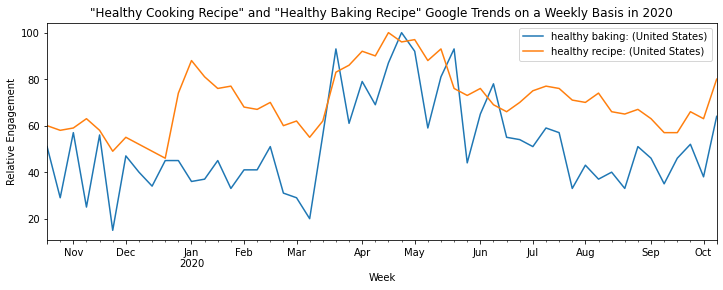

In [28]:
combined_df.plot(figsize=(12,4))
plt.ylabel('Relative Engagement')
plt.title('"Healthy Cooking Recipe" and "Healthy Baking Recipe" Google Trends on a Weekly Basis in 2020')

It appears that the search trend "Healthy Cooking Recipe" is always slightly more popular than "Healthy Baking Recipe", which makes sense given that people cook more than they bake. What is notable, however, is that both healthy baking and healthy recipe search trends seem to become more popular during quarantine. This is in the March 8th to Mid-May/ Early June time frame. To see this trend more clearly, I might want to look on a monthly scale

Text(0.5, 1.0, '"Healthy Cooking Recipe" and "Healthy Baking Recipe" Google Trends on a Monthly Basis in 2020')

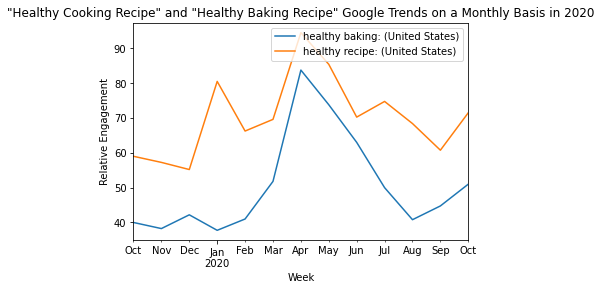

In [29]:
combined_df.resample('M').mean().plot()
plt.ylabel('Relative Engagement')
plt.title('"Healthy Cooking Recipe" and "Healthy Baking Recipe" Google Trends on a Monthly Basis in 2020')

This graph helps us look at the data on a monthly basis. Again, we can see that Healthy Recipe is always more popular, but both search trends seem to gain popularity in March which coincides with state quarantine mandates. To test if there is a correlation between healthy baking recipe searches and healthy recipes in general: 

In [30]:
combined_df.corr()

,healthy baking: (United States),healthy recipe: (United States)
healthy baking: (United States),1.000000,0.681074
healthy recipe: (United States),0.681074,1.000000


A correlation of one means there is a perfect positive correlation. This chart tells us that there is a 0.68 correlation between healthy baking and healthy recipe. This is good positive correlation, but I am not sure it tells us anything insightful about the data we are comparing. 

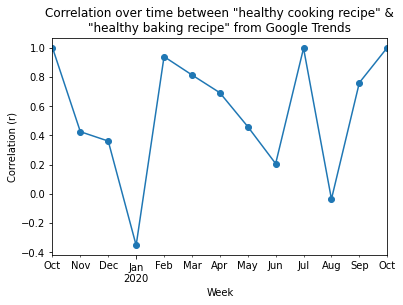

In [19]:
monthly_corr=combined_df.resample('M')[['healthy baking: (United States)', 'healthy recipe: (United States)']].corr().groupby(level=0).first()
monthly_corr['healthy recipe: (United States)'].plot(kind='line', style='o-')
plt.ylabel('Correlation (r)')
plt.title('Correlation over time between "healthy cooking recipe" &\n"healthy baking recipe" from Google Trends');

Ultimately, I cannot draw any real conclusions from this graph. It appears as though there is a perfect positive correlation between the searches for healthy baking and healthy cooking recipes in October, February, and July. This means that during those months, people were searching for both healthy baking and cooking the same amount. Again– this is not too insightful; however, it does suggest that there are times throughout the year in which people feel motivated to be healthy. 

This might not be the most insightful graph, but I wanted to test out using correlations for the future. A correlation of 1 is a perfect positive correlation. The next data set that I want to look at is COVID-19 cases in the United States. It is worth seeing if the spikes in these two search trends really do increase as more people tested positive for the virus. Logically, I would assume that more positive cases means more people staying at home, and cooking is a good home activity. This analysis is in the next notebook.